In [1]:
import pandas as pd
import numpy as np
import glob

# EDA img
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn
%matplotlib inline

home_dir = '/Users/zehaiwang/Downloads/2018NBA_Hackathon_Files/Business Analytics/'
file_list = glob.glob(home_dir+'*.csv')
print ([x.split('/')[-1].strip('.csv') for x in file_list])

['test_set', 'player_data', 'game_data', 'training_set']


In [2]:
test_df = pd.read_csv(file_list[0],parse_dates=["Game_Date"])
player_data = pd.read_csv(file_list[1],parse_dates=["Game_Date"])
game_data = pd.read_csv(file_list[2],parse_dates=["Game_Date"])
train_df = pd.read_csv(file_list[3],parse_dates=["Game_Date"])

In [3]:
# Sum viewers of all countries based on Game_ID
train_df = train_df.groupby(['Season','Game_ID','Game_Date','Away_Team','Home_Team'])['Rounded Viewers'].sum().reset_index()
train_df.rename(index=str, columns={"Rounded Viewers":"Total_Viewers"},inplace = True)
train_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers
0,2016-17,21600001,2016-10-25,NYK,CLE,57691
1,2016-17,21600002,2016-10-25,UTA,POR,40740
2,2016-17,21600003,2016-10-25,SAS,GSW,60428
3,2016-17,21600004,2016-10-26,MIA,ORL,22756
4,2016-17,21600005,2016-10-26,DAL,IND,33922


In [4]:
test_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers
0,2016-17,21600010,2016-10-26,DEN,NOP,NaN
1,2016-17,21600023,2016-10-28,HOU,DAL,NaN
2,2016-17,21600027,2016-10-29,BOS,CHA,NaN
3,2016-17,21600026,2016-10-29,ATL,PHI,NaN
4,2016-17,21600048,2016-11-01,LAL,IND,NaN


### Game information

#### Game data contains info:
  1. final score,  
  
  2. score difference at different period, 
  
  3. maximum score difference, 
 
  4. wins and losses till current game
  
### There are 920 missing values in the score

In [5]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 16 columns):
Season                4920 non-null object
Game_ID               4920 non-null int64
Game_Date             4920 non-null datetime64[ns]
Team                  4920 non-null object
Location              4920 non-null object
Wins_Entering_Gm      4920 non-null int64
Losses_Entering_Gm    4920 non-null int64
Team_Minutes          4000 non-null float64
Final_Score           4000 non-null float64
Lead_Changes          4000 non-null float64
Ties                  4000 non-null float64
Largest_Lead          4000 non-null float64
Full_Timeouts         4000 non-null float64
Short_Timeouts        4000 non-null float64
Qtr_4_Score           4000 non-null float64
L2M_Score             4000 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 615.1+ KB


In [6]:
def loss_rate(row):
    if (row.Losses_Entering_Gm ==0) or (row.Wins_Entering_Gm+row.Losses_Entering_Gm)<5:
        return 0
    else:
        return row.Losses_Entering_Gm/(row.Wins_Entering_Gm+row.Losses_Entering_Gm)

game_data['loss_rate'] = game_data.apply(loss_rate, axis = 1)

In [7]:
game_data.head()

,Season,Game_ID,Game_Date,Team,Location,Wins_Entering_Gm,Losses_Entering_Gm,Team_Minutes,Final_Score,Lead_Changes,Ties,Largest_Lead,Full_Timeouts,Short_Timeouts,Qtr_4_Score,L2M_Score,loss_rate
0,2016-17,21600001,2016-10-25,CLE,H,0,0,240.0,117.0,1.0,3.0,32.0,4.0,1.0,82.0,113.0,0.0
1,2016-17,21600001,2016-10-25,NYK,A,0,0,240.0,88.0,0.0,1.0,4.0,4.0,2.0,64.0,84.0,0.0
2,2016-17,21600002,2016-10-25,POR,H,0,0,240.0,113.0,6.0,6.0,13.0,5.0,0.0,77.0,104.0,0.0
3,2016-17,21600002,2016-10-25,UTA,A,0,0,240.0,104.0,5.0,1.0,8.0,5.0,2.0,83.0,102.0,0.0
4,2016-17,21600003,2016-10-25,GSW,H,0,0,240.0,100.0,1.0,2.0,4.0,3.0,1.0,77.0,100.0,0.0


In [8]:
l = game_data.groupby('Game_ID')['loss_rate'].sum()

### Rate with less loss_rate tend to have higher viewer rate

In [9]:
eda_df = pd.merge(train_df,l.to_frame().reset_index(),on='Game_ID')
eda_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,loss_rate
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,0.0
1,2016-17,21600002,2016-10-25,UTA,POR,40740,0.0
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,0.0
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,0.0
4,2016-17,21600005,2016-10-26,DAL,IND,33922,0.0


Text(0,0.5,'Frequency')

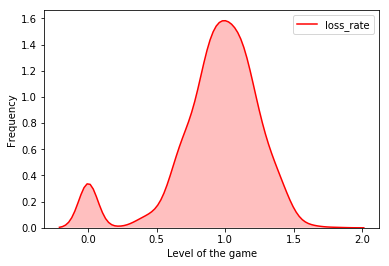

In [10]:
g = sns.kdeplot(eda_df["loss_rate"], color="Red", shade = True)
g.set_xlabel("Level of the game")
g.set_ylabel("Frequency")

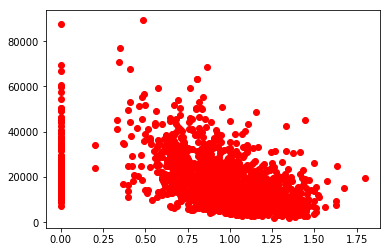

In [11]:
plt.plot(eda_df["loss_rate"],eda_df["Total_Viewers"],'ro')

### Loss rate can evaluate quality of the team
mean_value gives the overall status of the season

In [12]:
team_name_map = pd.read_csv('/Users/zehaiwang/Downloads/2018NBA_Hackathon_Files/external_data/name_map.txt',sep='\t')
team_name_map.head()

,Short,Team
0,ATL,Atlanta Hawks
1,BKN,Brooklyn Nets
2,BOS,Boston Celtics
3,CHA,Charlotte Hornets
4,CHI,Chicago Bulls


In [13]:
team_rating_2015 = pd.read_csv('/Users/zehaiwang/Downloads/2018NBA_Hackathon_Files/external_data/2015_team_rating.txt')
team_rating_2016 = pd.read_csv('/Users/zehaiwang/Downloads/2018NBA_Hackathon_Files/external_data/2016_team_rating.txt')
team_rating_2017 = pd.read_csv('/Users/zehaiwang/Downloads/2018NBA_Hackathon_Files/external_data/2017_team_rating.txt')
team_rating_2016.head()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,1,Golden State Warriors,W,P,67,15,0.817,11.63,116.26,104.57,11.69,11.35,116.02,104.61,11.41
1,2,San Antonio Spurs,W,SW,61,21,0.744,7.20,111.81,104.25,7.56,7.13,111.62,104.12,7.49
2,3,Houston Rockets,W,SW,55,27,0.671,5.77,115.59,109.96,5.63,5.84,115.70,109.98,5.72
3,4,Los Angeles Clippers,W,P,51,31,0.622,4.29,113.38,108.88,4.50,4.42,113.46,108.82,4.64
4,5,Utah Jazz,W,NW,51,31,0.622,3.94,110.46,106.19,4.27,4.00,110.31,105.98,4.33


In [14]:
team_rating_2015= pd.merge(team_rating_2015,team_name_map,on='Team')[['Rk','Short','Div','W/L%','NRtg/A']].rename(index=str, columns={'Short':'Team'})

In [15]:
def hist_loss(row):
    return np.log((row.Rk+5)/5)/(row['W/L%']+1)/1.7

team_rating_2015['derived_loss_rate'] = team_rating_2015.apply(hist_loss, axis=1)

In [16]:
team_rate_2015 = dict(zip(team_rating_2015['Team'],team_rating_2015['derived_loss_rate']))
team_rate_2015

{'ATL': 0.32490953325437,
 'BKN': 0.8837905812253558,
 'BOS': 0.35461549268043663,
 'CHA': 0.38211891526485736,
 'CHI': 0.5937038217767854,
 'CLE': 0.20398634908975158,
 'DAL': 0.558311751201884,
 'DEN': 0.7075601886255889,
 'DET': 0.5109269649555437,
 'GSW': 0.10472214024936598,
 'HOU': 0.5436448474979962,
 'IND': 0.44170843041266883,
 'LAC': 0.2817730542363914,
 'LAL': 0.9342183401637805,
 'MEM': 0.6261429786936276,
 'MIA': 0.4541753318322938,
 'MIL': 0.7655237442523478,
 'MIN': 0.7784166605387327,
 'NOP': 0.756979552817317,
 'NYK': 0.7290590764879827,
 'OKC': 0.1654534548687773,
 'ORL': 0.6466119452219158,
 'PHI': 1.020189865290612,
 'PHX': 0.8530781205724385,
 'POR': 0.49023454608368644,
 'SAC': 0.691725528902988,
 'SAS': 0.059024752110445326,
 'TOR': 0.242265974820854,
 'UTA': 0.43430277066259876,
 'WAS': 0.5810213885977316}

In [17]:
team_rating_2016= pd.merge(team_rating_2016,team_name_map,on='Team')[['Rk','Short','Div','W/L%','NRtg/A']].rename(index=str, columns={'Short':'Team'})
team_rating_2016['derived_loss_rate'] = team_rating_2016.apply(hist_loss, axis=1)
team_rate_2016 = dict(zip(team_rating_2016['Team'],team_rating_2016['derived_loss_rate']))
team_rate_2016

{'ATL': 0.6212127190188746,
 'BKN': 0.9064321033582661,
 'BOS': 0.341473606256678,
 'CHA': 0.5457225470025507,
 'CHI': 0.5436448474979962,
 'CLE': 0.3174979101160151,
 'DAL': 0.7228189132084851,
 'DEN': 0.5063780223996143,
 'DET': 0.668366086507229,
 'GSW': 0.059024752110445326,
 'HOU': 0.1654534548687773,
 'IND': 0.5937038217767854,
 'LAC': 0.21316699242116455,
 'LAL': 0.8428557099613113,
 'MEM': 0.4489543036149764,
 'MIA': 0.47991193396945714,
 'MIL': 0.5764101077358449,
 'MIN': 0.6696046776717517,
 'NOP': 0.701059635655884,
 'NYK': 0.7648593311824704,
 'OKC': 0.41083440734008075,
 'ORL': 0.845386284236386,
 'PHI': 0.814272926422611,
 'PHX': 0.8300574550980602,
 'POR': 0.5627782452114991,
 'SAC': 0.7439094022650755,
 'SAS': 0.11348901666932436,
 'TOR': 0.28594232260980285,
 'UTA': 0.2513770873141167,
 'WAS': 0.37901031332590673}

In [18]:
eda_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,loss_rate
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,0.0
1,2016-17,21600002,2016-10-25,UTA,POR,40740,0.0
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,0.0
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,0.0
4,2016-17,21600005,2016-10-26,DAL,IND,33922,0.0


In [19]:
def fill_zero_loss_rate(row):
    if (row.loss_rate==0.0) & (row.Season=='2016-17'):
        return team_rate_2015[row.Away_Team]+team_rate_2015[row.Home_Team]
    if (row.loss_rate==0.0) & (row.Season=='2017-18'):
        return team_rate_2016[row.Away_Team]+team_rate_2016[row.Home_Team]
    else:
        return row.loss_rate

In [20]:
eda_df['loss_rate']=eda_df.apply(fill_zero_loss_rate,axis=1)

Text(0,0.5,'Frequency')

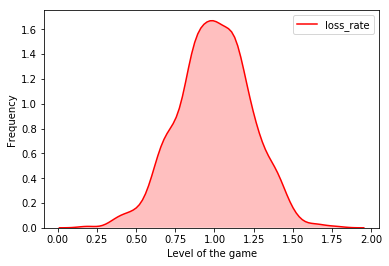

In [21]:
g = sns.kdeplot(eda_df["loss_rate"], color="Red", shade = True)
g.set_xlabel("Level of the game")
g.set_ylabel("Frequency")

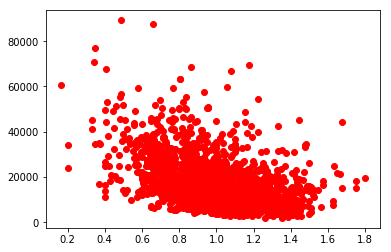

In [22]:
plt.plot(eda_df["loss_rate"],eda_df["Total_Viewers"],'ro')

In [23]:
Team_rate = game_data.groupby(['Season','Team'])['loss_rate'].describe().reset_index().sort_values(by=['Season','mean'])

In [24]:
Team_rate.head()

,Season,Team,count,mean,std,min,25%,50%,75%,max
9,2016-17,GSW,82.0,0.157099,0.052775,0.0,0.142857,0.155364,0.181818,0.333333
26,2016-17,SAS,82.0,0.206690,0.061220,0.0,0.200000,0.217029,0.228446,0.375000
5,2016-17,CLE,82.0,0.248154,0.100015,0.0,0.217731,0.276389,0.318907,0.370370
10,2016-17,HOU,82.0,0.296048,0.091887,0.0,0.272727,0.307072,0.324919,0.500000
12,2016-17,LAC,82.0,0.301570,0.120892,0.0,0.252315,0.354248,0.395655,0.420290


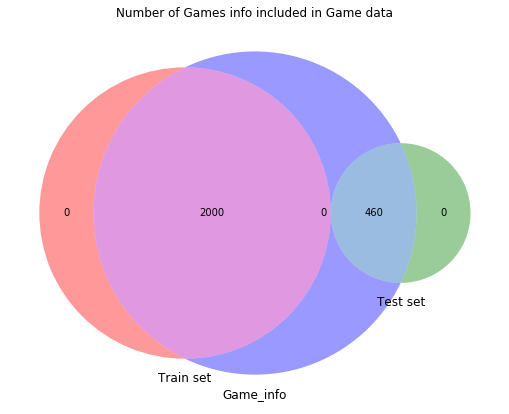

In [25]:
from matplotlib_venn import venn3

plt.figure(figsize=(10,7))
venn3([set(train_df.Game_ID.unique()), set(test_df.Game_ID.unique()),set(game_data.Game_ID.unique())], set_labels = ('Train set', 'Test set','Game_info') )
plt.title("Number of Games info included in Game data", fontsize=12)
plt.show()

## Effect of the Game Date on viewers

In [26]:
full_df = [train_df, test_df]

In [27]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays= cal.holidays()

for df in full_df:
    df['weekday'] = df.Game_Date.dt.weekday
    df['month'] = df.Game_Date.dt.month
    df['holiday']= df.Game_Date.isin(holidays)

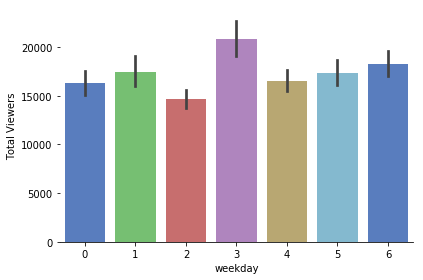

In [28]:
g = sns.factorplot(x="weekday",y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

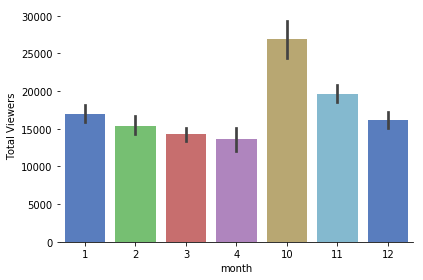

In [29]:
g = sns.factorplot(x="month",y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

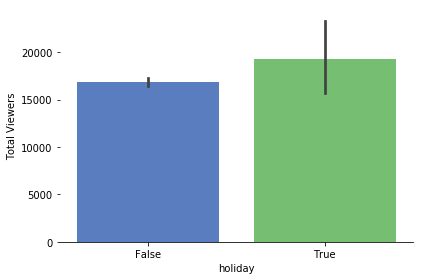

In [30]:
g = sns.factorplot(x="holiday",y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

## Effect of super stars

In [31]:
# number ASG player in the Game
player_data['ASG_status'] = (player_data['ASG_Team']!= 'None')
ASG_per_Game = player_data.groupby('Game_ID')['ASG_status'].sum().to_frame().reset_index()

In [32]:
train_df = train_df.merge(ASG_per_Game, on='Game_ID')

In [33]:
for df in full_df:
    df = df.merge(ASG_per_Game, on='Game_ID')

In [34]:
train_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,1,10,False,4.0
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,1,10,False,5.0
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,2,10,False,0.0
4,2016-17,21600005,2016-10-26,DAL,IND,33922,2,10,False,1.0


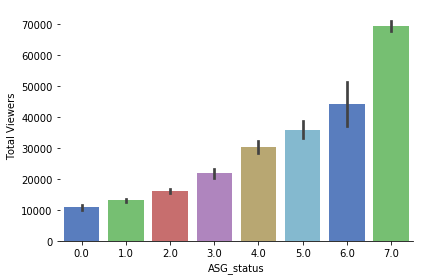

In [35]:
g = sns.factorplot(x="ASG_status",y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

### Team effect with good history

In [36]:
eda_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,loss_rate
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,0.933045
1,2016-17,21600002,2016-10-25,UTA,POR,40740,0.924537
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,0.163747
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,1.100787
4,2016-17,21600005,2016-10-26,DAL,IND,33922,1.000020


In [38]:
train_df.merge(eda_df[['Game_ID','loss_rate']], on='Game_ID').head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,loss_rate
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,1,10,False,4.0,0.933045
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0,0.924537
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,1,10,False,5.0,0.163747
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,2,10,False,0.0,1.100787
4,2016-17,21600005,2016-10-26,DAL,IND,33922,2,10,False,1.0,1.000020


## Team ranking effect

In [44]:
Team_level = pd.merge(team_rating_2015[['Team','Rk']],team_rating_2016[['Team','Rk']],on='Team')

In [47]:
Team_level['level'] = (Team_level['Rk_x']+Team_level['Rk_y'])//2

In [50]:
Team_level_2016 = Team_level.sort_values(by='level')[['Team','level']]

In [52]:
level_2016 = dict(zip(Team_level_2016['Team'],Team_level_2016['level']))

In [53]:
def calculate_match_level(row):
    return level_2016[row.Home_Team]+level_2016[row.Away_Team]

In [54]:
train_df['Match_level'] = train_df.apply(calculate_match_level, axis=1)

In [55]:
train_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,1,10,False,4.0,29
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0,21
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,1,10,False,5.0,2
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,2,10,False,0.0,36
4,2016-17,21600005,2016-10-26,DAL,IND,33922,2,10,False,1.0,33


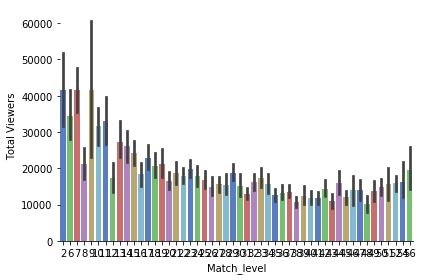

In [57]:
g = sns.factorplot(x="Match_level",y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

In [60]:
def calculate_team_level(row):
    return min(level_2016[row.Home_Team],level_2016[row.Away_Team])

train_df['Best_team_level'] = train_df.apply(calculate_team_level, axis=1)

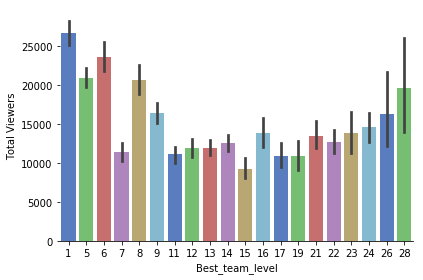

In [65]:
g = sns.factorplot(x='Best_team_level',y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

In [62]:
train_df[train_df['Best_team_level']==28]

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level,Best_team_level
127,2016-17,21600157,2016-11-15,BKN,LAL,25781,1,11,False,0.0,56,28
460,2016-17,21600560,2017-01-08,PHI,BKN,15482,6,1,False,0.0,56,28
806,2016-17,21600990,2017-03-12,PHI,LAL,16709,6,3,False,0.0,56,28
905,2016-17,21601105,2017-03-28,PHI,BKN,7136,1,3,False,0.0,56,28
945,2016-17,21601154,2017-04-04,BKN,PHI,6193,1,4,False,0.0,56,28
1114,2017-18,21700130,2017-11-03,BKN,LAL,26075,4,11,False,0.0,56,28
1185,2017-18,21700214,2017-11-15,PHI,LAL,39009,2,11,False,1.0,56,28
1311,2017-18,21700363,2017-12-07,LAL,PHI,40089,3,12,False,1.0,56,28
1628,2017-18,21700768,2018-02-02,LAL,BKN,16835,4,2,False,0.0,56,28
1814,2017-18,21700999,2018-03-11,PHI,BKN,9117,6,3,False,1.0,56,28


## lakers have lager viewers population due to history reasons

In [66]:
train_df[train_df['Best_team_level']==7]

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level,Best_team_level
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0,21,7
21,2016-17,21600024,2016-10-28,LAL,UTA,25043,4,10,False,1.0,35,7
52,2016-17,21600062,2016-11-02,DAL,UTA,10241,2,11,False,1.0,26,7
72,2016-17,21600087,2016-11-06,UTA,NYK,32867,6,11,False,2.0,31,7
91,2016-17,21600108,2016-11-09,UTA,CHA,9833,2,11,False,2.0,18,7
103,2016-17,21600124,2016-11-11,UTA,ORL,8935,4,11,True,1.0,31,7
111,2016-17,21600136,2016-11-12,UTA,MIA,7971,5,11,False,1.0,19,7
121,2016-17,21600151,2016-11-14,MEM,UTA,12146,0,11,False,2.0,22,7
139,2016-17,21600173,2016-11-17,CHI,UTA,17728,3,11,False,2.0,23,7
148,2016-17,21600184,2016-11-19,UTA,HOU,23656,5,11,False,2.0,16,7


In [70]:
# Another rank https://www.ranker.com/crowdranked-list/favorite-nba-basketball-teams

level = {'ATL': 13,
 'BKN': 28,
 'BOS': 6,
 'CHA': 11,
 'CHI': 3,
 'CLE': 5,
 'DAL': 16,
 'DEN': 17,
 'DET': 17,
 'GSW': 1,
 'HOU': 12,
 'IND': 14,
 'LAC': 11,
 'LAL': 2,
 'MEM': 15,
 'MIA': 7,
 'MIL': 21,
 'MIN': 13,
 'NOP': 23,
 'NYK': 10,
 'OKC': 5,
 'ORL': 24,
 'PHI': 28,
 'PHX': 26,
 'POR': 9,
 'SAC': 22,
 'SAS': 8,
 'TOR': 4,
 'UTA': 17,
 'WAS': 13}

In [71]:
def calculate_team_level(row):
    return min(level[row.Home_Team],level[row.Away_Team])

train_df['Best_team_level'] = train_df.apply(calculate_team_level, axis=1)

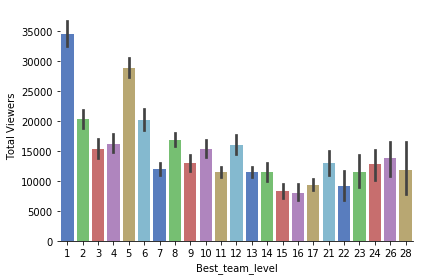

In [72]:
g = sns.factorplot(x='Best_team_level',y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")